## 라벨링 데이터
- 필요 없는 데이터 삭제
- 전반적인 데이터 통계치 확인

In [1]:
import os
import shutil
import zipfile
import json
import pandas as pd
from glob import glob

label_dir = r"C:\Users\USER\Desktop\동아리\O.P.C\프로젝트\라벨링 데이터\112.공적말하기_실습_및_평가_데이터\3.개방데이터\1.데이터\Training\02.라벨링데이터"
unzip_dir = "./unzipped_라벨링"

part_files = sorted(glob(os.path.join(label_dir, "*.zip.part*")))

if not part_files:
    raise FileNotFoundError("병합할 .zip.part* 파일이 없습니다.")

zip_filename = part_files[0].split(".zip.part")[0] + ".zip"
merged_path = os.path.join(label_dir, zip_filename)

with open(merged_path, "wb") as outfile:
    for part in part_files:
        with open(part, "rb") as pf:
            shutil.copyfileobj(pf, outfile)

print(f"병합 완료: {merged_path}")

병합 완료: C:\Users\USER\Desktop\동아리\O.P.C\프로젝트\라벨링 데이터\112.공적말하기_실습_및_평가_데이터\3.개방데이터\1.데이터\Training\02.라벨링데이터\TL_1.언어적_4._A03_30대.zip


In [2]:
with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall("unzipped_data")

In [21]:
label_root = r"C:\Users\USER\Desktop\동아리\O.P.C\프로젝트"
json_paths = glob(os.path.join(label_root, "**", "*.json"), recursive=True)

#빈 리스트 생성
label_dts = []

#json 파일 하나씩 열기
for path in json_paths:
    with open(path, "r", encoding="utf-8") as f:
        data = json.load(f)

    label_dt = {}

    # 발표자
    label_dt["gender"] = data.get("speaker", {}).get("gender", "")
    
    # 발표 스크립트 원문
    label_dt["presen_script"] = data.get("presentation", {}).get("presen_script", "")

    # 발표 내용
    label_dt["start_time"] = data.get("script", {}).get("start_time", "")
    label_dt["end_time"] = data.get("script", {}).get("end_time", "")
    label_dt["script_stt_txt"] = data.get("script", {}).get("script_stt_txt", "")
    label_dt["script_tag_txt"] = data.get("script", {}).get("script_tag_txt", "")
    label_dt["word_cnt"] = data.get("script", {}).get("word_cnt", 0)
    label_dt["audible_word_cnt"] = data.get("script", {}).get("audible_word_cnt", 0)
    label_dt["sent_cnt"] = data.get("script", {}).get("sent_cnt", 0)

    # 평가 점수(평균)
    label_dt["repeat_scr"] = data.get("average", {}).get("repeat_scr", 0.0)
    label_dt["filler_words_scr"] = data.get("average", {}).get("filler_words_scr", 0.0)
    label_dt["pause_scr"] = data.get("average", {}).get("pause_scr", 0.0)
    label_dt["wrong_scr"] = data.get("average", {}).get("wrong_scr", 0.0)
    label_dt["voc_quality_scr"] = data.get("average", {}).get("voc_quality_scr", 0.0)
    label_dt["vor_speed_sec_scr"] = data.get("average", {}).get("voc_speed_sec_scr", 0.0)
    label_dt["eval_grade"] = data.get("average", {}).get("eval_grade", "")

    # eval_grade 점수 변환
    label_dt["eval_grade"] = {"A+":8.0,"A0":7.0,"B+":6.0,"B0":5.0,"C+":4.0,"C0":3.0,"D+":2.0,"D0":1.0,"F":0.0}.get(label_dt["eval_grade"], None)

    # 파일명
    label_dt["filename"] = data.get("info", {}).get("filename", "")

    # 읽어들인 딕셔너리를 빈 리스트에 추가
    label_dts.append(label_dt)

# DataFrame으로 변환
df_presentations = pd.DataFrame(label_dts)

In [22]:
df_presentations.head()

,gender,presen_script,start_time,end_time,script_stt_txt,script_tag_txt,word_cnt,audible_word_cnt,sent_cnt,repeat_scr,filler_words_scr,pause_scr,wrong_scr,voc_quality_scr,vor_speed_sec_scr,eval_grade,filename
0,여자,"안녕하십니까? 여러분, 오늘은 e스포츠가 젊은이들에게 미치는 긍정적인 영향에 대해 ...",00:00,04:36,안녕하십니까 여러분.오늘은 e스포츠가 젊은이들에게 미치는 긍정적인 영향에 대해 이야...,안녕하십니까 여러분.오늘은 e스포츠가 젊은이들에게 미치는 긍정적인 영향에 대해 이야...,298,287,26,4.9,4.85,4.85,2.95,3.20,1.25,5.0,A03_S01_F_A_01_001_02_WA_MO_presentation.json
1,여자,안녕하십니까? E스포츠가 젊은이들에게 미치는 부정적인 영향에 대해 논의해 보고자 합...,00:00,04:07,안녕하십니까 E스포츠가 젊은이들에게 미치는 부정적인 영향에 대해 논의해 보고자 합니...,안녕하십니까 E스포츠가 젊은이들에게 미치는 부정적인 영향에 대해 논의해 보고자 합니...,370,355,25,3.0,4.85,4.80,3.00,3.50,3.15,5.0,A03_S01_F_A_02_005_02_WA_MO_presentation.json
2,여자,"안녕하십니까? 여러분, 오늘은 e스포츠가 젊은이들에게 미치는 긍정적인 영향에 대해 ...",00:00,04:08,안녕하십니까 여러분 오늘은 e스포츠가 젊은이들에게 미치는 긍정적인 영향에 대해 이야...,안녕하십니까 여러분 오늘은 e스포츠가 젊은이들에게 미치는 긍정적인 영향에 대해 이야...,303,294,25,4.9,4.80,4.85,3.95,4.05,1.05,5.0,A03_S01_F_A_02_006_02_WA_MO_presentation.json
3,여자,안녕하십니까? 오늘은 e스포츠가 산업에 미치는 영향에 대해 이야기하고자 합니다. 최...,00:00,04:45,안녕하십니까? 오늘은 e스포츠가 산업에 미치는 영향에 대해 이야기하고자 합니다. 최...,안녕하십니까? 오늘은 e스포츠가 산업에 미치는 영향에 대해 이야기하고자 합니다. 최...,377,375,26,3.1,4.85,4.85,3.95,3.40,1.10,4.0,A03_S01_F_A_03_007_02_WA_MO_presentation.json
4,여자,안녕하십니까? 오늘은 e스포츠가 산업에 미치는 영향에 대해 이야기하고자 합니다. 최...,00:01,06:10,안녕하십니까 오늘은 e스포츠가 산업에 미치는 영향에 대해 이야기하고자 합니다. 최근...,안녕하십니까 오늘은 e스포츠가 산업에 미치는 영향에 대해 이야기하고자 합니다. 최근...,396,395,24,2.0,1.00,4.80,3.90,2.60,1.05,3.0,A03_S01_F_A_03_009_02_WA_MO_presentation.json


In [16]:
df_presentations.to_csv('prasantation_label_30.csv')

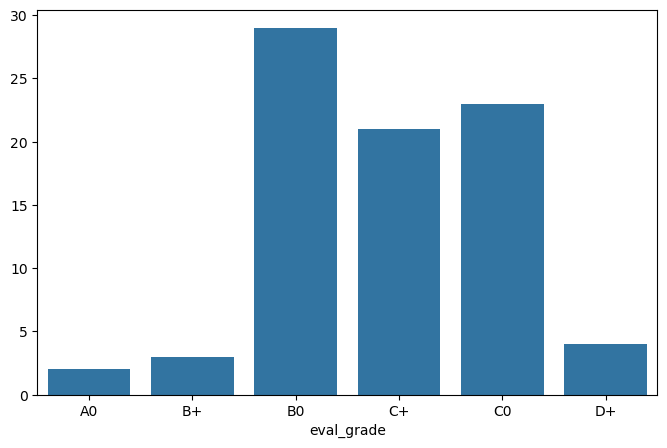

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

#폰트 에러 메세지 삭제
import logging
logging.getLogger('matplotlib.font_manager').setLevel(logging.ERROR)

grade_counts = df_presentations["eval_grade"].value_counts().sort_index()

plt.figure(figsize=(8, 5))
sns.barplot(x=grade_counts.index, y=grade_counts.values)
plt.show()

In [ ]:
df_presentations.describe()

## 원본 데이터
- 라벨링 데이터에 원본 데이터 파일이 존재하는지 확인
- 원본 데이터 파일이 정상적으로 열리는지 확인

In [ ]:
video_part_dir = r"C:\Users\USER\Desktop\동아리\O.P.C\프로젝트\원본 데이터\112.공적말하기_실습_및_평가_데이터\3.개방데이터\1.데이터\Training\01.원천데이터"
unzip_dir = "./unzipped_영상"

part_files = sorted(glob(os.path.join(video_part_dir, "*.zip.part*")), key=lambda x: int(x.split("part")[-1]))

zip_filename = part_files[0].split(".zip.part")[0] + ".zip"
merged_zip_path = os.path.join(video_part_dir, zip_filename)

with open(merged_zip_path, "wb") as outfile:
    for part in part_files:
        with open(part, "rb") as pf:
            shutil.copyfileobj(pf, outfile)

print(f"병합 완료: {merged_zip_path}")

os.makedirs(unzip_dir, exist_ok=True)
with zipfile.ZipFile(merged_zip_path, 'r') as zip_ref:
    zip_ref.extractall(unzip_dir)

print(f"압축 해제 완료: {unzip_dir}")

In [ ]:
# 라벨링 데이터 - 원본 데이터 매핑
# 저장된 영상 파일 이름에 맞게 변환
df_presentations["file_stem"] = df_presentations["filename"].apply(
    lambda x: x.replace("_presentation.json", "")
)

# 영상 파일 이름 추출
video_dir = r"C:\Users\USER\Desktop\동아리\O.P.C\unzipped_영상"
video_files = {
    os.path.splitext(f)[0]: f
    for f in os.listdir(video_dir)
    if f.lower().endswith(".mp4")
}

# 존재 여부 매핑
df_presentations["video_exists"] = df_presentations["file_stem"].apply(
    lambda stem: stem in video_files
)

# 매칭된 발표만 필터링
df_matched = df_presentations[df_presentations["video_exists"] == True].copy()

print(f"매칭된 발표 수: {len(df_matched)} / {len(df_presentations)}")
df_matched.head()

In [ ]:
import sys
!{sys.executable} -m pip install opencv-python

In [ ]:
# 영상 재생 여부 확인
import cv2 # OpenCV 라이브러리 (영상 파일을 열고 프레임을 읽을 수 있음)

video_dir = r"C:\Users\USER\Desktop\동아리\O.P.C\unzipped_영상"
video_paths = [os.path.join(video_dir, f) for f in os.listdir(video_dir) if f.endswith(".mp4")]

results = []

for path in video_paths:
    filename = os.path.basename(path)
    cap = cv2.VideoCapture(path)

    if not cap.isOpened():
        results.append((filename, "열기 실패"))
        continue

    ret, frame = cap.read()
    if not ret:
        results.append((filename, "프레임 읽기 실패"))
    else:
        results.append((filename, "정상"))

    cap.release()

print(f"{len(results)}개 영상 점검 완료\n")
for fname, status in results:
    print(f"{status} - {fname}")

In [ ]:
!pip install moviepy

In [ ]:
from moviepy import VideoFileClip

In [ ]:
# 비디오 - 오디오 변환
video_dir = r"C:\Users\USER\Desktop\동아리\O.P.C\unzipped_영상"
output_dir = "./wav"
os.makedirs(output_dir, exist_ok=True)

for idx, row in df_matched.iterrows():
    stem = row["file_stem"]
    mp4_path = os.path.join(video_dir, f"{stem}.mp4")
    wav_path = os.path.join(output_dir, f"{stem}.wav")
    
    try:
        video = VideoFileClip(mp4_path)
        video.audio.write_audiofile(wav_path, codec='pcm_s16le')  # wav 포맷
        print(f"변환 완료: {stem}.wav")
    except Exception as e:
        print(f"변환 실패: {stem} - {e}")